In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import glob, os

In [2]:
#문자열을 int 로 암호화
import hashlib
def get_hash_value(in_str, in_digest_bytes_size=64, in_return_type='digest'):
    """해시값을 구한다 
    Parameter: in_str: 해싱할문자열, in_digest_bytes_size: Digest바이트크기, 
               in_return_type: 반환형태(digest or hexdigest or number) """
    assert 1 <= in_digest_bytes_size and in_digest_bytes_size <= 64
    blake  = hashlib.blake2b(in_str.encode('utf-8'), digest_size=in_digest_bytes_size)
    if in_return_type == 'hexdigest': return blake.hexdigest()
    elif in_return_type == 'number': return int(blake.hexdigest(), base=16)
    return blake.digest()

In [3]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    id = get_hash_value(in_str=filename, in_digest_bytes_size=5, in_return_type='number')
    
    return np.array([id], dtype=np.uint64)
#     subject_id, etc = filename.split('__')
#     gender, lr, finger, _ = etc.split('_')
    
#     gender = 0 if gender == 'M' else 1
#     lr = 0 if lr =='Left' else 1
    
#     if finger == 'thumb':
#         finger = 0
#     elif finger == 'index':
#         finger = 1
#     elif finger == 'middle':
#         finger = 2
#     elif finger == 'ring':
#         finger = 3
#     elif finger == 'little':
#         finger = 4
        
#     return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

이미지개수: 9640


9640it [00:18, 515.39it/s]


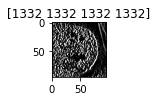

In [8]:
img_list = sorted(glob.glob('C:/Users/DI Lee/Desktop/capstone/noseprint/sobel_all/*.jpg'))
print("이미지개수:", len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in tqdm(enumerate(img_list)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     img = cv2.Sobel(img, cv2.CV_8U, 1, 0, 3)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label(img_path)
    
np.save('C:/Users/DI Lee/Desktop/capstone_github/dognose_recognition_management_service/dognose_recognition/dataset/npy/noseprint_sobel_all.npy', imgs)
np.save('C:/Users/DI Lee/Desktop/capstone_github/dognose_recognition_management_service/dognose_recognition/dataset/npy/noseprint_label_sobel_all.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')